<a href="https://colab.research.google.com/github/Jahnavi-Sri-Kavya/Data-Science-Projects/blob/main/Frailty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os

# Define the root directory
root_dir = '/content/project_frailty'

# Create the root directory
os.makedirs(root_dir, exist_ok=True)

# Create subdirectories for each stage
stages = ['data_preparation', 'reports', 'src']
for stage in stages:
    stage_dir = os.path.join(root_dir, stage)
    os.makedirs(stage_dir, exist_ok=True)

    # Create subdirectories within each stage
   # data_dir = os.path.join(stage_dir, 'Data')
    #os.makedirs(data_dir, exist_ok=True)


    # Optionally, you can create subdirectories within the "Data" and "Models" folders
    if stage == 'data_preparation':
        os.makedirs(os.path.join(stage_dir, 'raw_data'), exist_ok=True)
        os.makedirs(os.path.join(stage_dir, 'cleaned_data'), exist_ok=True)

# Display the folder structure
!ls -R /content/project_frailty


/content/project_frailty:
data_preparation  reports  src

/content/project_frailty/data_preparation:
cleaned_data  raw_data

/content/project_frailty/data_preparation/cleaned_data:

/content/project_frailty/data_preparation/raw_data:

/content/project_frailty/reports:

/content/project_frailty/src:


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Create a DataFrame with the provided data
data = {
    'Height': [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    'Weight': [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    'Age': [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    'Grip_strength': [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    'Frailty': ['N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N']
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = '/content/project_frailty/data_preparation/raw_data/frailty_data_raw.csv'
df.to_csv(csv_filename, index=False)

# Display the path to the saved CSV file
csv_filename

'/content/project_frailty/data_preparation/raw_data/frailty_data_raw.csv'

In [9]:
metadata_content = """
Dataset Information:

Frailty is physical weakness; lack of health or strength. Reduced grip strength in females correlated
with higher frailty scores and vice versa. Hand grip strength can be quantified by measuring the amount
of static force that the hand can squeeze around a dynamometer. The force has most commonly been
measured in kilograms and pounds.

Dataset Details:

- Height: Measured in inches.
- Weight: Measured in pounds.
- Age: Measured in years.
- Grip strength: Measured in kilograms.
- Frailty: Qualitative attribute indicating the presence or absence of symptoms.

Data Source:
The table below represents data from 10 female participants.

Height | Weight | Age | Grip Strength | Frailty
----------------------------------------------
65.8   | 112    | 30  | 30            | N
71.5   | 136    | 19  | 31            | N
69.4   | 153    | 45  | 29            | N
68.2   | 142    | 22  | 28            | Y
67.8   | 144    | 29  | 24            | Y
68.7   | 123    | 50  | 26            | N
69.8   | 141    | 51  | 22            | Y
70.1   | 136    | 23  | 20            | Y
67.9   | 112    | 17  | 19            | N
66.8   | 120    | 39  | 31            | N
"""

# Specify the path for the metadata.txt file
metadata_file_path = '/content/project_frailty/data_preparation/raw_data/metadata.txt'

# Write the metadata content to the file
with open(metadata_file_path, 'w') as metadata_file:
    metadata_file.write(metadata_content)

# Display the path to the saved metadata.txt file
metadata_file_path


'/content/project_frailty/data_preparation/raw_data/metadata.txt'

In [10]:
df = pd.read_csv('/content/project_frailty/data_preparation/raw_data/frailty_data_raw.csv')

In [11]:
print(df)

   Height  Weight  Age  Grip_strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y
5    68.7     123   50             26       N
6    69.8     141   51             22       Y
7    70.1     136   23             20       Y
8    67.9     112   17             19       N
9    66.8     120   39             31       N


In [12]:
# Encode Frailty column to 0 and 1
df['Frailty'] = df['Frailty'].map({'N': 0, 'Y': 1})

In [13]:
# Save the updated DataFrame to a new CSV file
encoded_csv_filename = '/content/project_frailty/data_preparation/clean_data/frailty_data_clean.csv'
df.to_csv(encoded_csv_filename, index=False)

In [14]:
df

,Height,Weight,Age,Grip_strength,Frailty
0,65.8,112,30,30,0
1,71.5,136,19,31,0
2,69.4,153,45,29,0
3,68.2,142,22,28,1
4,67.8,144,29,24,1
5,68.7,123,50,26,0
6,69.8,141,51,22,1
7,70.1,136,23,20,1
8,67.9,112,17,19,0
9,66.8,120,39,31,0


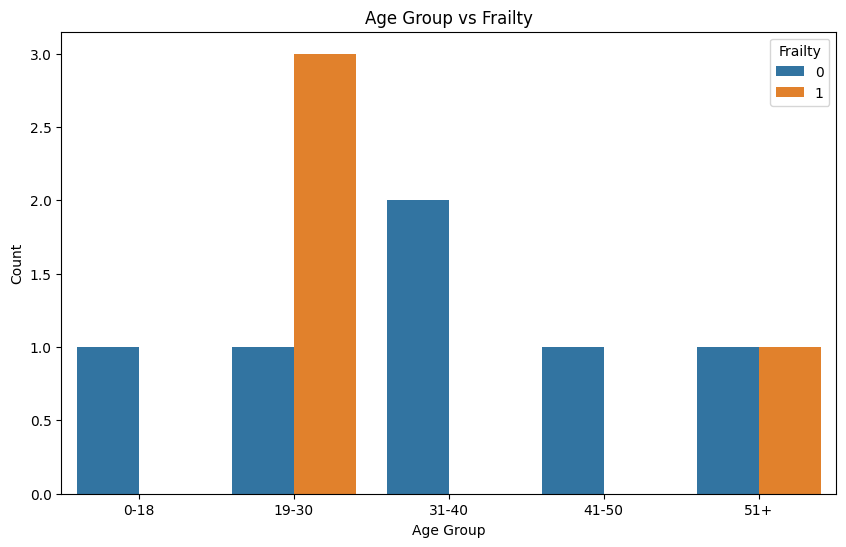

In [24]:
# Define age groups
age_bins = [0, 18, 30, 40, 50, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Report on Age Group vs Frailty
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Frailty', data=df)
plt.title('Age Group vs Frailty')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [27]:
# Specify the folder path to save the graph
output_folder = '/content/project_frailty/reports'
# Save the graph to the specified folder
output_file_path = os.path.join(output_folder, 'age_group_vs_frailty_count_plot.png')
plt.savefig(output_file_path)

<Figure size 640x480 with 0 Axes>

In [28]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [29]:
!git add .


In [30]:
!git commit -m "Initial commit"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@c2bd87dcd450.(none)')


In [32]:
!git config --global user.email "jahnavi.bollimuntha@gmail.com"
!git config --global user.name "Jahnavi-Sri-Kavya"

In [33]:
!git commit -m "Initial commit"

[master (root-commit) bb89268] Initial commit
 24 files changed, 50925 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2024.02.09/14.19.38.353595.log
 create mode 100644 .config/logs/2024.02.09/14.20.03.220731.log
 create mode 100644 .config/logs/2024.02.09/14.20.11.873556.log
 create mode 100644 .config/logs/2024.02.09/14.20.19.242403.log
 create mode 100644 .config/logs/2024.02.09/14.20.28.133425.log
 create mode 100644 .config/logs/2024.02.09/14.20.28.894064.log
 create mode 100644 project_frailty/data_preparation/clean_data/frailty_data_clean.csv
 create mode 100644 project_frailty/data_preparation/raw_data/f

In [34]:
!git remote add origin https://github.com/Jahnavi-Sri-Kavya/Principles-of-Data-Science.git